# Balance of Evidence TotalValue. Value-based experiment

In [22]:
data = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Like_NoBin_31.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]

data2 = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Dislike_NoBin_Inv_31.csv'))
# Subset only necessary columns
data2 = data2[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]

In [23]:
# Load data for FF2018 study 

# Like condition 

data_all0 = pd.read_csv('data/FF2018_data/DataFoodFramingNotebook_31.csv')
data_all0 = data_all0.drop(['Unnamed: 0'], axis=1)
data_all = data_all0.loc[data_all0['BlockCond'] == 1] # 1 = Like, 2 = Dislike

data_all=data_all.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})

# Dislike condition

data_all2 = data_all0.loc[data_all0['BlockCond'] == 2] # 1 = Like, 2 = Dislike

data_all2=data_all2.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})

In [24]:
sufix = 'individual_Like_NoBin_Gamma-11_NUTS_31'
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_'+sufix+'.csv')):  
        data_simulation_like = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_'+sufix+'.csv'))
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_NoGaze_'+sufix+'.csv')):  
        data_simulation_like_nobias = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_NoGaze_'+sufix+'.csv'))        

In [25]:
sufix = 'individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31'
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_'+sufix+'.csv')):  
        data_simulation_dislike = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_'+sufix+'.csv'))
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_NoGaze_'+sufix+'.csv')):  
        data_simulation_dislike_nobias = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_NoGaze_'+sufix+'.csv'))

## Invert the values for dislike

In [26]:
data_simulation_dislike['TotVal_orig'] = 6 - data_simulation_dislike['TotVal']
data_simulation_dislike["zTotVal_orig"] = z_score1(data_simulation_dislike,'Part',"TotVal_orig")

In [27]:
data_simulation_dislike_nobias['TotVal_orig'] = 6 - data_simulation_dislike_nobias['TotVal']
data_simulation_dislike_nobias["zTotVal_orig"] = z_score1(data_simulation_dislike_nobias,'Part',"TotVal_orig")

## For Like frame

In [28]:
%%R -i data_simulation_like  -i data_all -i data_simulation_like_nobias

d_sim <- data_simulation_like
d_sim_nobias <- data_simulation_like_nobias
d_hum <- data_all

BIC: 101510.1  BIC: 101554.4  BIC: 101554.4
Call:  glm(formula = zConf ~ zAbsDVal + zTotVal + zRT, data = d_hum)

Coefficients:
(Intercept)     zAbsDVal      zTotVal          zRT  
    0.07449      0.14002      0.08652     -0.26744  

Degrees of Freedom: 3719 Total (i.e. Null);  3716 Residual
Null Deviance:	    3353 
Residual Deviance: 2964 	AIC: 9721


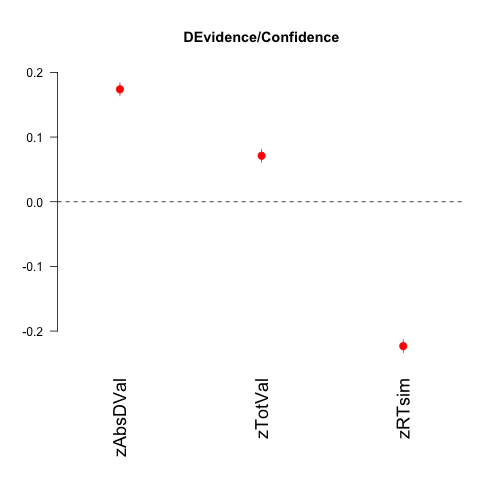

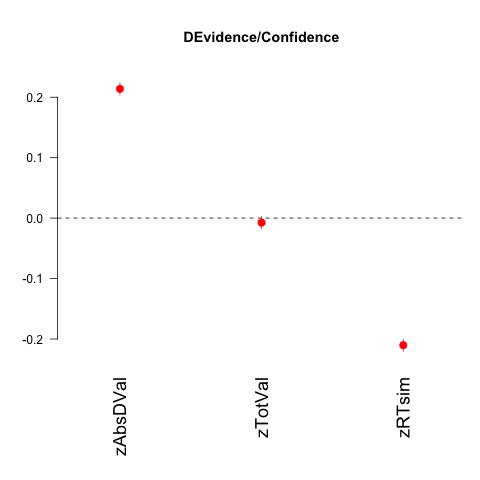

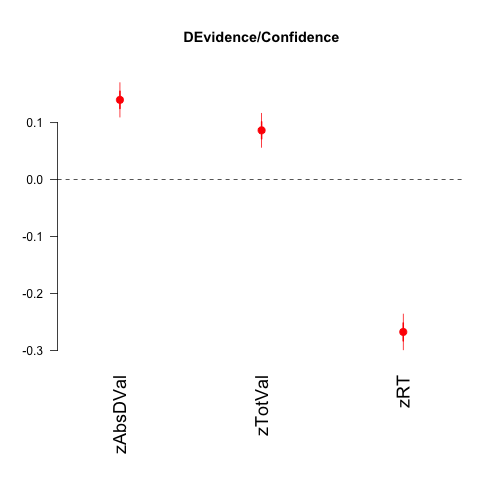

In [29]:
%%R    
title_plot = "DEvidence/Confidence"
ModelDev <- glm(zAbsDEv ~ zAbsDVal + zTotVal + zRTsim  , data= d_sim)
coefplot(ModelDev,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelDev_nobias <- glm(zAbsDEv ~ zAbsDVal + zTotVal + zRTsim  , data= d_sim_nobias)
coefplot(ModelDev_nobias,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelConf <- glm(zConf ~ zAbsDVal + zTotVal + zRT  , data= d_hum)
coefplot(ModelConf,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

BIC1choice = BIC(ModelDev)
cat("BIC:" , BIC1choice," ")
ModelDev

BIC1choice = BIC(ModelDev_nobias)
cat("BIC:" , BIC1choice," ")
ModelDev_nobias

IC1choice = BIC(ModelConf)
cat("BIC:" , BIC1choice)
ModelConf

In [30]:
%%R
summary(ModelDev)$coefficients

                 Estimate  Std. Error       t value      Pr(>|t|)
(Intercept) -6.045506e-16 0.004906273 -1.232199e-13  1.000000e+00
zAbsDVal     1.738241e-01 0.005045991  3.444796e+01 5.199009e-256
zTotVal      7.110320e-02 0.005001899  1.421524e+01  9.713562e-46
zRTsim      -2.233222e-01 0.004976163 -4.487838e+01  0.000000e+00


In [31]:
%%R
summary(ModelDev_nobias)$coefficients

                 Estimate  Std. Error       t value Pr(>|t|)
(Intercept) -6.708208e-16 0.004909195 -1.366458e-13 1.000000
zAbsDVal     2.138290e-01 0.005059374  4.226393e+01 0.000000
zTotVal     -7.467614e-03 0.004996546 -1.494555e+00 0.135039
zRTsim      -2.102166e-01 0.004972312 -4.227743e+01 0.000000


In [32]:
%%R    
# Extract Coefficients
ModelDev_Coef = summary(ModelDev)$coefficients[2:4,1]
ModelDev_nobias_Coef = summary(ModelDev_nobias)$coefficients[2:4,1]
ModelConf_Coef = summary(ModelConf)$coefficients[2:4,1]

# Extract Standard Error
ModelDev_SE = summary(ModelDev)$coefficients[2:4,2]
ModelDev_nobias_SE = summary(ModelDev_nobias)$coefficients[2:4,2]
ModelConf_SE = summary(ModelConf)$coefficients[2:4,2]

# Extract p-value
ModelDev_p = summary(ModelDev)$coefficients[2:4,4]
ModelDev_nobias_p = summary(ModelDev_nobias)$coefficients[2:4,4]
ModelConf_p = summary(ModelConf)$coefficients[2:4,4]

In [33]:
%R -o ModelDev_Coef  -o ModelDev_nobias_Coef -o ModelConf_Coef 
ModelDev_Coefs = ModelDev_Coef
ModelDev_nobias_Coefs = ModelDev_nobias_Coef
ModelConf_Coefs = ModelConf_Coef

In [34]:
%R -o ModelDev_SE  -o ModelDev_nobias_SE -o ModelConf_SE 
ModelDev_SEs = ModelDev_SE
ModelDev_nobias_SEs = ModelDev_nobias_SE
ModelConf_SEs = ModelConf_SE

In [35]:
%R -o ModelDev_p  -o ModelDev_nobias_p -o ModelConf_p 
ModelDev_ps = ModelDev_p
ModelDev_nobias_ps = ModelDev_nobias_p
ModelConf_ps = ModelConf_p

In [36]:
x1 = np.arange(len(ModelDev_Coefs))-.25
x2 = np.arange(len(ModelDev_Coefs))
x3 = np.arange(len(ModelDev_Coefs))+.25

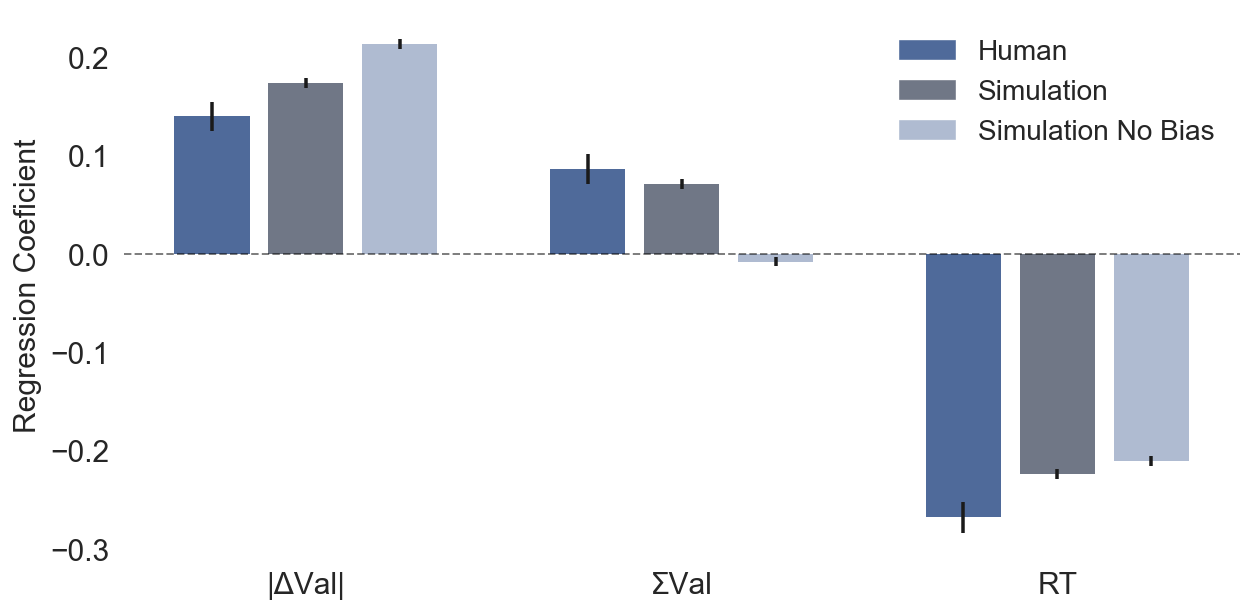

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2

plt.bar(x1, ModelConf_Coefs,yerr=ModelConf_SEs, color=['#4F6A9A' ],width = width_bars,hatch='')
plt.bar(x2, ModelDev_Coefs, yerr=ModelDev_SEs,  color=['#707786' ],width = width_bars,hatch='')
plt.bar(x3, ModelDev_nobias_Coefs,yerr=ModelDev_nobias_SEs, color=['#AFBBD1' ],width = width_bars,hatch='')

plt.xticks(x2, ( '|ΔVal|', 'ΣVal','RT'),fontsize=15)
#plt.ylim(950, 1200)

Sim_patch = mpatches.Patch(color='#707786', label='Simulation')
Sim_nb_patch = mpatches.Patch(color='#AFBBD1', label='Simulation No Bias')
Hum_patch = mpatches.Patch(color='#4F6A9A', label='Human')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[Hum_patch,Sim_patch,Sim_nb_patch],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
#ax.axvline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)

sns.despine(left =False, bottom = False)


#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_Like_BalanceEvidence_TotVal.png'), dpi = 200 )

## Extracting Params only for TotVal

In [38]:
ModelDev_Coefs_TotVal = ModelDev_Coefs[1]
ModelDev_nobias_Coefs_TotVal = ModelDev_nobias_Coefs[1]
ModelConf_Coefs_TotVal = ModelConf_Coefs[1]

ModelDev_SEs_TotVal = ModelDev_SEs[1] 
ModelDev_nobias_SEs_TotVal = ModelDev_nobias_SEs[1]
ModelConf_SEs_TotVal = ModelConf_SEs[1]

ModelDev_ps_TotVal = ModelDev_ps[1] 
ModelDev_nobias_ps_TotVal = ModelDev_nobias_ps[1] 
ModelConf_ps_TotVal = ModelConf_ps[1]

# put everything in a vector 
Like_ModelDev_c_TotVal = [ModelDev_Coefs_TotVal,ModelDev_SEs_TotVal,ModelDev_ps_TotVal]
Like_ModelDev_nobias_c_TotVal = [ModelDev_nobias_Coefs_TotVal,ModelDev_nobias_SEs_TotVal,ModelDev_nobias_ps_TotVal]
Like_ModelConf_Coefs_TotVal = [ModelConf_Coefs_TotVal,ModelConf_SEs_TotVal,ModelConf_ps_TotVal]


# -----------------------------------------------------
# Extract coefficients for the full regression (to plot)
one_ModelDev_Coefs_all = ModelDev_Coefs
one_ModelDev_SE_all = ModelDev_SEs
one_ModelDev_ps_all = ModelDev_ps

one_ModelDev_nobias_Coefs_all = ModelDev_nobias_Coefs
one_ModelDev_nobias_SE_all = ModelDev_nobias_SEs
one_ModelDev_nobias_ps_all = ModelDev_nobias_ps

one_ModelConf_Coefs_all = ModelConf_Coefs
one_ModelConf_SE_all = ModelConf_SEs
one_ModelConf_ps_all = ModelConf_ps

## For DISLIKE frame

In [39]:
%%R -i data_simulation_dislike  -i data_all2 -i data_simulation_dislike_nobias

d_sim <- data_simulation_dislike
d_sim_nobias <- data_simulation_dislike_nobias
d_hum <- data_all2

BIC: 103605.9  BIC: 102320.9  BIC: 102320.9
Call:  glm(formula = zConf ~ zAbsDVal + zTotVal + zRT, data = d_hum)

Coefficients:
(Intercept)     zAbsDVal      zTotVal          zRT  
   -0.07089      0.18816     -0.15851     -0.30716  

Degrees of Freedom: 3719 Total (i.e. Null);  3716 Residual
Null Deviance:	    4019 
Residual Deviance: 3357 	AIC: 10190


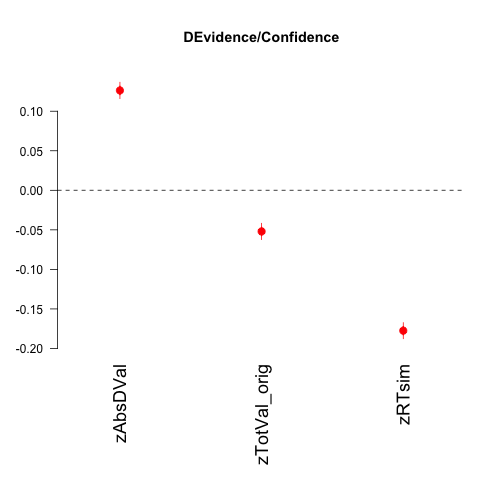

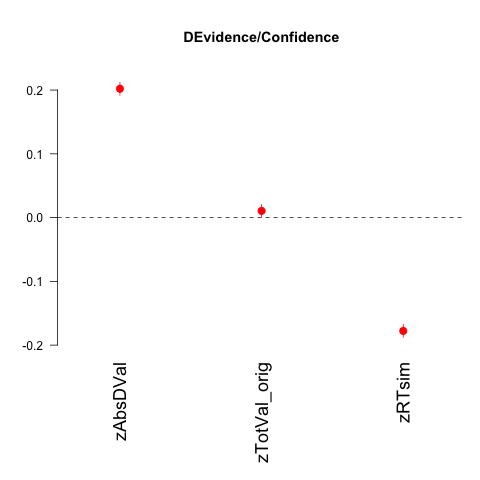

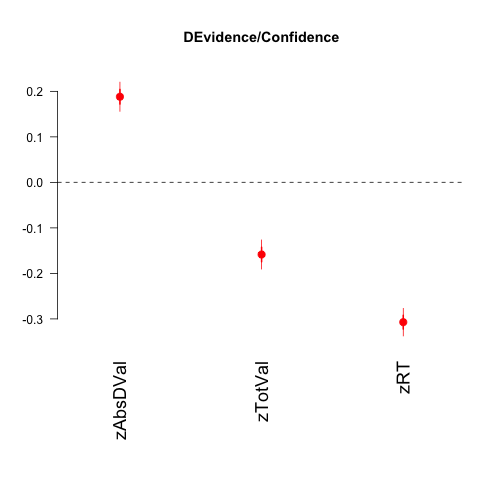

In [40]:
%%R    
title_plot = "DEvidence/Confidence"
ModelDev <- glm(zAbsDEv ~ zAbsDVal + zTotVal_orig + zRTsim  , data= d_sim)
coefplot(ModelDev,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelDev_nobias <- glm(zAbsDEv ~ zAbsDVal + zTotVal_orig + zRTsim  , data= d_sim_nobias)
coefplot(ModelDev_nobias,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelConf <- glm(zConf ~ zAbsDVal + zTotVal + zRT  , data= d_hum)
coefplot(ModelConf,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

BIC1choice = BIC(ModelDev)
cat("BIC:" , BIC1choice," ")
ModelDev

BIC1choice = BIC(ModelDev_nobias)
cat("BIC:" , BIC1choice," ")
ModelDev_nobias

IC1choice = BIC(ModelConf)
cat("BIC:" , BIC1choice)
ModelConf

In [41]:
%%R
summary(ModelConf)$coefficients

               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) -0.07089201 0.01563456  -4.534314 5.961328e-06
zAbsDVal     0.18815779 0.01602290  11.743055 2.720980e-31
zTotVal     -0.15850700 0.01598495  -9.916012 6.808294e-23
zRT         -0.30716106 0.01512383 -20.309743 4.757853e-87


In [42]:
%%R
summary(ModelDev)$coefficients

                  Estimate  Std. Error       t value      Pr(>|t|)
(Intercept)   8.037082e-17 0.005046442  1.592623e-14  1.000000e+00
zAbsDVal      1.262812e-01 0.005170590  2.442298e+01 1.047202e-130
zTotVal_orig -5.200564e-02 0.005144048 -1.010987e+01  5.365192e-24
zRTsim       -1.775026e-01 0.005078596 -3.495111e+01 2.317825e-263


In [43]:
%%R
summary(ModelDev_nobias)$coefficients

                  Estimate  Std. Error       t value      Pr(>|t|)
(Intercept)  -3.195224e-16 0.004960034 -6.441941e-14  1.000000e+00
zAbsDVal      2.021020e-01 0.005112744  3.952907e+01  0.000000e+00
zTotVal_orig  1.050488e-02 0.005051376  2.079608e+00  3.756838e-02
zRTsim       -1.777099e-01 0.005024159 -3.537107e+01 1.423872e-269


In [44]:
%%R    
# Extract Coefficients
ModelDev_Coef = summary(ModelDev)$coefficients[2:4,1]
ModelDev_nobias_Coef = summary(ModelDev_nobias)$coefficients[2:4,1]
ModelConf_Coef = summary(ModelConf)$coefficients[2:4,1]

# Extract Standard Error
ModelDev_SE = summary(ModelDev)$coefficients[2:4,2]
ModelDev_nobias_SE = summary(ModelDev_nobias)$coefficients[2:4,2]
ModelConf_SE = summary(ModelConf)$coefficients[2:4,2]

In [45]:
%R -o ModelDev_Coef  -o ModelDev_nobias_Coef -o ModelConf_Coef 
ModelDev_Coefs = ModelDev_Coef
ModelDev_nobias_Coef = ModelDev_nobias_Coef
ModelConf_Coefs = ModelConf_Coef

In [46]:
%R -o ModelDev_SE  -o ModelDev_nobias_SE -o ModelConf_SE 
ModelDev_SEs = ModelDev_SE
ModelDev_nobias_SEs = ModelDev_nobias_SE
ModelConf_SEs = ModelConf_SE

In [47]:
x1 = np.arange(len(ModelDev_Coefs))-.25
x2 = np.arange(len(ModelDev_Coefs))
x3 = np.arange(len(ModelDev_Coefs))+.25

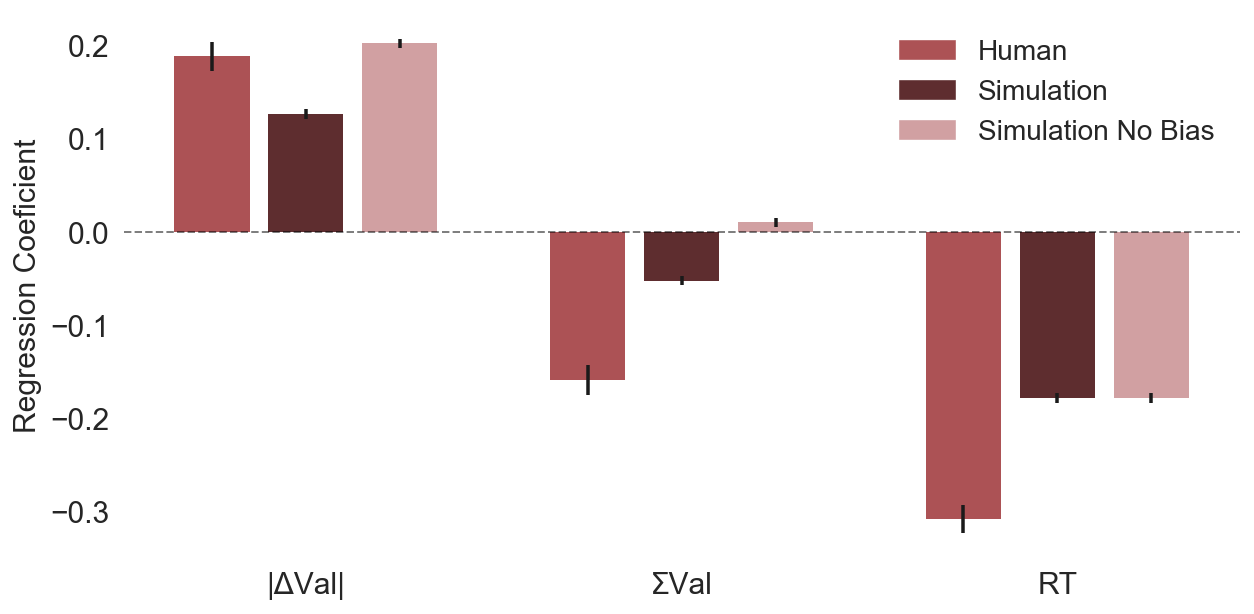

In [48]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2
plt.bar(x1, ModelConf_Coefs,yerr=ModelConf_SEs, color=['#AC5255' ],width = width_bars,hatch='')
plt.bar(x2, ModelDev_Coefs, yerr=ModelDev_SEs,  color=['#5E2D2F' ],width = width_bars,hatch='')
plt.bar(x3, ModelDev_nobias_Coef,yerr=ModelDev_nobias_SEs, color=['#D1A0A2' ],width = width_bars,hatch='')

plt.xticks(x2, ('|ΔVal|', 'ΣVal','RT'),fontsize=15)#plt.ylim(950, 1200)
plt.ylabel('Regression Coeficient')

Sim_patch = mpatches.Patch(color='#5E2D2F', label='Simulation')
Sim_nb_patch = mpatches.Patch(color='#D1A0A2', label='Simulation No Bias')
Hum_patch = mpatches.Patch(color='#AC5255', label='Human')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[Hum_patch,Sim_patch,Sim_nb_patch],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
ax.set_frame_on(True)


#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()

plt.show()

fig.savefig(str('SavedFigures/GLAM_individual_Dislike_BalanceEvidence_TotVal.png'), dpi = 200 )

## Extracting Params only for TotVal

In [49]:
ModelDev_Coefs_TotVal = ModelDev_Coefs[1]
ModelDev_nobias_Coefs_TotVal = ModelDev_nobias_Coefs[1]
ModelConf_Coefs_TotVal = ModelConf_Coefs[1]

ModelDev_SEs_TotVal = ModelDev_SEs[1] 
ModelDev_nobias_SEs_TotVal = ModelDev_nobias_SEs[1]
ModelConf_SEs_TotVal = ModelConf_SEs[1]

ModelDev_ps_TotVal = ModelDev_ps[1] 
ModelDev_nobias_ps_TotVal = ModelDev_nobias_ps[1] 
ModelConf_ps_TotVal = ModelConf_ps[1]

# put everything in a vector 
Dislike_ModelDev_c_TotVal = [ModelDev_Coefs_TotVal,ModelDev_SEs_TotVal,ModelDev_ps_TotVal]
Dislike_ModelDev_nobias_c_TotVal = [ModelDev_nobias_Coefs_TotVal,ModelDev_nobias_SEs_TotVal,ModelDev_nobias_ps_TotVal]
Dislike_ModelConf_Coefs_TotVal = [ModelConf_Coefs_TotVal,ModelConf_SEs_TotVal,ModelConf_ps_TotVal]

# -----------------------------------------------------
# Extract coefficients for the full regression (to plot)
two_ModelDev_Coefs_all = ModelDev_Coefs
two_ModelDev_SE_all = ModelDev_SEs
two_ModelDev_ps_all = ModelDev_ps

two_ModelDev_nobias_Coefs_all = ModelDev_nobias_Coefs
two_ModelDev_nobias_SE_all = ModelDev_nobias_SEs
two_ModelDev_nobias_ps_all = ModelDev_nobias_ps

two_ModelConf_Coefs_all = ModelConf_Coefs
two_ModelConf_SE_all = ModelConf_SEs
two_ModelConf_ps_all = ModelConf_ps

## Plot ΣVal only 1

In [50]:
x11 = 1-.25
x21 = 1
x31 = 1+.25

x12 = 2-.25
x22 = 2
x32 = 2+.25

<Figure size 1440x720 with 0 Axes>

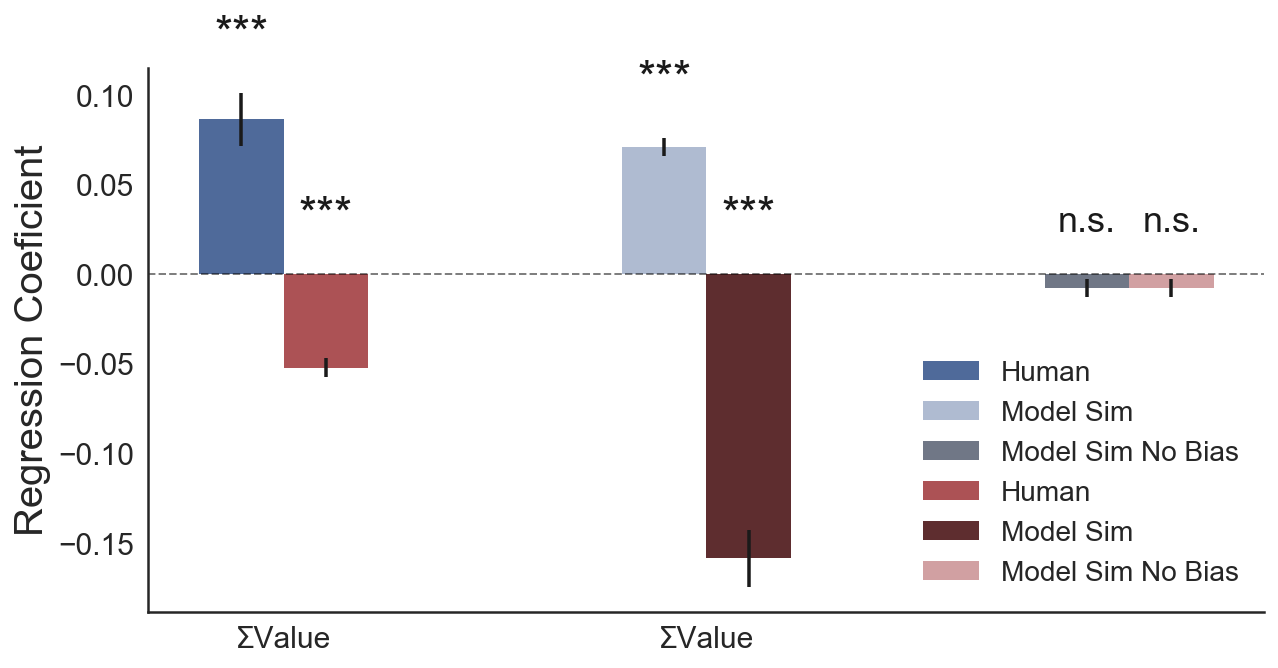

In [76]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')


width_bars = 0.2
  
# Like
plt.bar(x11, Like_ModelConf_Coefs_TotVal[0], yerr=Like_ModelConf_Coefs_TotVal[1], color=['#4F6A9A' ],width = width_bars,hatch='')
plt.bar(x21, Like_ModelDev_c_TotVal[0], yerr=Like_ModelDev_c_TotVal[1], color=['#AFBBD1' ],width = width_bars,hatch='')
plt.bar(x31, Like_ModelDev_nobias_c_TotVal[0], yerr=Like_ModelDev_nobias_c_TotVal[1],  color=['#707786' ],width = width_bars,hatch='')

# Dislike
plt.bar(x22, Dislike_ModelConf_Coefs_TotVal[0], yerr=Dislike_ModelConf_Coefs_TotVal[1], color=['#5E2D2F' ],width = width_bars,hatch='')
plt.bar(x12, Dislike_ModelDev_c_TotVal[0], yerr=Dislike_ModelDev_c_TotVal[1], color=['#AC5255' ],width = width_bars,hatch='')
plt.bar(x32, Dislike_ModelDev_nobias_c_TotVal[0], yerr=Dislike_ModelDev_nobias_c_TotVal[1],  color=['#D1A0A2' ],width = width_bars,hatch='')

plt.xticks([1,2], ('ΣValue','ΣValue'),fontsize=15)
#plt.xlim(0, 2.4)

# add-stars

if Like_ModelConf_Coefs_TotVal[2]< 0.05:
    add_star_indiv(x11, Like_ModelConf_Coefs_TotVal[0], Like_ModelConf_Coefs_TotVal[1],Like_ModelConf_Coefs_TotVal[2])
else:
    add_ns_indiv(x11, Like_ModelConf_Coefs_TotVal[0], Like_ModelConf_Coefs_TotVal[1])

if Like_ModelDev_c_TotVal[2]<0.05:
    add_star_indiv(x21, Like_ModelDev_c_TotVal[0], Like_ModelDev_c_TotVal[1],Like_ModelDev_c_TotVal[2])
else:
    add_ns_indiv(x21, Like_ModelDev_c_TotVal[0], Like_ModelDev_c_TotVal[1])

if Like_ModelDev_nobias_c_TotVal[2]<0.05:
    add_star_indiv(x31, Like_ModelDev_nobias_c_TotVal[0], Like_ModelDev_nobias_c_TotVal[1],Like_ModelDev_nobias_c_TotVal[2])
else:
    add_ns_indiv(x31, Like_ModelDev_nobias_c_TotVal[0], Like_ModelDev_nobias_c_TotVal[1])
     
if Dislike_ModelConf_Coefs_TotVal[2]<0.05:
    add_star_indiv(x12, Dislike_ModelConf_Coefs_TotVal[0], Dislike_ModelConf_Coefs_TotVal[1],Dislike_ModelConf_Coefs_TotVal[2])
else:
    add_ns_indiv(x12, Dislike_ModelConf_Coefs_TotVal[0], Dislike_ModelConf_Coefs_TotVal[1])

if Dislike_ModelDev_c_TotVal[2]<0.05:
    add_star_indiv(x22, Dislike_ModelDev_c_TotVal[0], Dislike_ModelDev_c_TotVal[1],Dislike_ModelDev_c_TotVal[2])
else:
    add_ns_indiv(x22, Dislike_ModelDev_c_TotVal[0], Dislike_ModelDev_c_TotVal[1])
    
if Dislike_ModelDev_nobias_c_TotVal[2]<=0.05:
    add_star_indiv(x32, Dislike_ModelDev_nobias_c_TotVal[0], Dislike_ModelDev_nobias_c_TotVal[1],Dislike_ModelDev_nobias_c_TotVal[2])   
else:
    add_ns_indiv(x32, Dislike_ModelDev_nobias_c_TotVal[0], Dislike_ModelDev_nobias_c_TotVal[1])   

    
Hum_patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Human')
Sim_patch1 = mpatches.Patch(facecolor='#AFBBD1',hatch=r'', label='Model Sim')
Sim_nb_patch1 = mpatches.Patch(facecolor='#707786',hatch=r'', label='Model Sim No Bias')

Hum_patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Human')
Sim_patch2 = mpatches.Patch(facecolor='#5E2D2F',hatch=r'', label='Model Sim')
Sim_nb_patch2 = mpatches.Patch(facecolor='#D1A0A2',hatch=r'', label='Model Sim No Bias')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=20)
leg = plt.legend(handles=[Hum_patch1,Sim_patch1,Sim_nb_patch1,Hum_patch2,Sim_patch2,Sim_nb_patch2],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
sns.despine()

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_LikeDislike_TotVal_BalanceEvidence_TotVal.png'), dpi = 200 )

## Plot ΣVal only 2

In [52]:
x11 = 1 - .1
x12 = 1 + .1

x21 = 2 - .1
x22 = 2 + .1

x31 = 3 - .1
x32 = 3 + .1

<Figure size 1440x720 with 0 Axes>

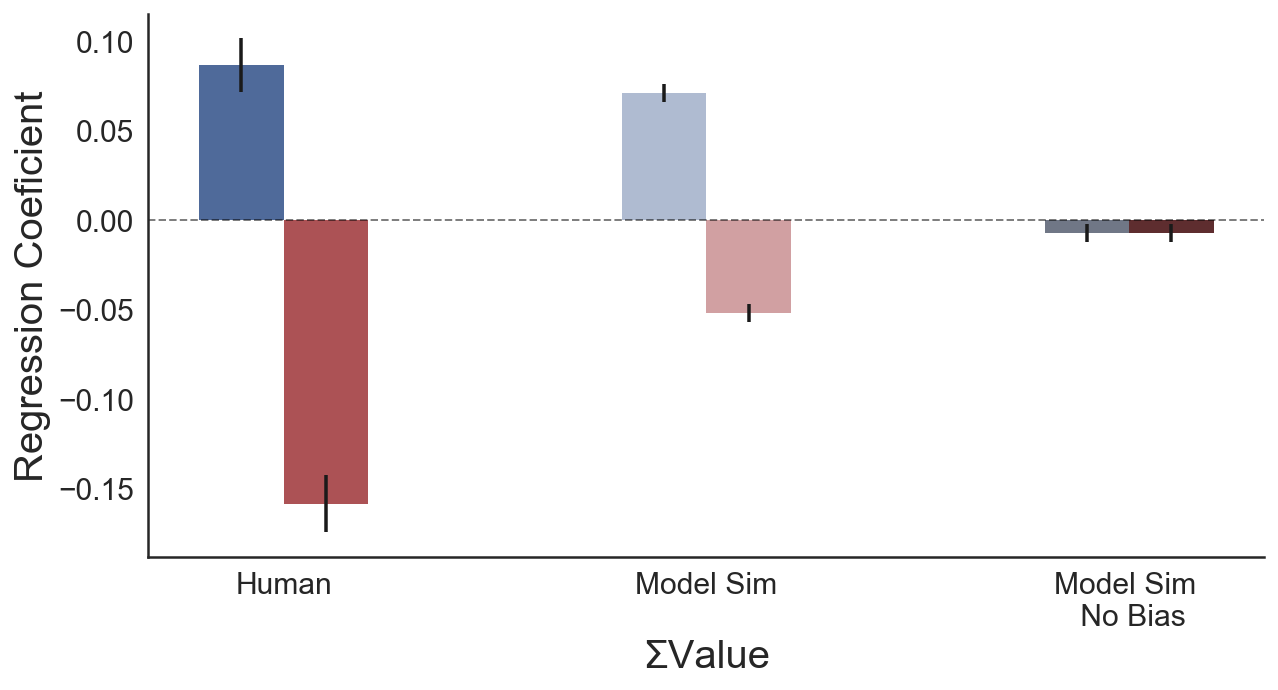

In [77]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')


width_bars = 0.2
  
# Human
plt.bar(x11, Like_ModelConf_Coefs_TotVal[0], yerr=Like_ModelConf_Coefs_TotVal[1], color=['#4F6A9A' ],width = width_bars,hatch='')
plt.bar(x12, Dislike_ModelConf_Coefs_TotVal[0], yerr=Dislike_ModelConf_Coefs_TotVal[1], color=['#AC5255' ],width = width_bars,hatch='')

# Simulation
plt.bar(x21, Like_ModelDev_c_TotVal[0], yerr=Like_ModelDev_c_TotVal[1], color=['#AFBBD1' ],width = width_bars,hatch='')
plt.bar(x22, Dislike_ModelDev_c_TotVal[0], yerr=Dislike_ModelDev_c_TotVal[1], color=['#D1A0A2' ],width = width_bars,hatch='')


# Simulation No Bias
plt.bar(x31, Like_ModelDev_nobias_c_TotVal[0], yerr=Like_ModelDev_nobias_c_TotVal[1],  color=['#707786' ],width = width_bars,hatch='')
plt.bar(x32, Dislike_ModelDev_nobias_c_TotVal[0], yerr=Dislike_ModelDev_nobias_c_TotVal[1],  color=['#5E2D2F' ],width = width_bars,hatch='')

plt.xticks([1,2,3], ('Human','Model Sim','Model Sim \n No Bias',),fontsize=15)
#plt.xlim(0, 2.4)


Hum_patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Human')
Hum_patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Human')

Sim_patch1 = mpatches.Patch(facecolor='#AFBBD1',hatch=r'', label='Model Sim')
Sim_nb_patch1 = mpatches.Patch(facecolor='#707786',hatch=r'', label='Model Sim')

Sim_patch2 = mpatches.Patch(facecolor='#5E2D2F',hatch=r'', label='Model Sim No Bias')
Sim_nb_patch2 = mpatches.Patch(facecolor='#D1A0A2',hatch=r'', label='Model Sim No Bias')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=20)
plt.xlabel('ΣValue',fontsize=20)
#leg = plt.legend(handles=[Hum_patch1,Sim_patch1,Sim_nb_patch1,Hum_patch2,Sim_patch2,Sim_nb_patch2],fontsize=14)
#leg.get_frame().set_facecolor('none')
#leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
sns.despine()

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_LikeDislike_TotVal_BalanceEvidence_TotVal2.png'), dpi = 200 )

# Full DE regressions and confidence split

# Like
# Add Splits considering pooled data


In [54]:
data_simulation_like["AbsDESplitAll"] = pd.to_numeric(pd.qcut(data_simulation_like["AbsDEv"].values, 2, labels=[0, 1]))
data_simulation_like["DVal"] = data_simulation_like['RVal'] - data_simulation_like['LVal']
data_simulation_like["zDVal"] = z_score1(data_simulation_like,'Part',"DVal")

# No bias (no gaze asymmetry simulation)
data_simulation_like_nobias["AbsDESplitAll"] = pd.to_numeric(pd.qcut(data_simulation_like_nobias["AbsDEv"].values, 2, labels=[0, 1]))
data_simulation_like_nobias["DVal"] = data_simulation_like_nobias['RVal'] - data_simulation_like_nobias['LVal']
data_simulation_like_nobias["zDVal"] = z_score1(data_simulation_like_nobias,'Part',"DVal")

## Logistic regression for choice
### Consider that for human data, in this case we are taking out the additional subjects we had trouble with the GLAM simulations

Low measure:logit coef = [[0.76966156]] ; Intercept:  [0.03627869]
high measure:logit coef = [[1.63392185]] ; Intercept:  [-0.05144388]


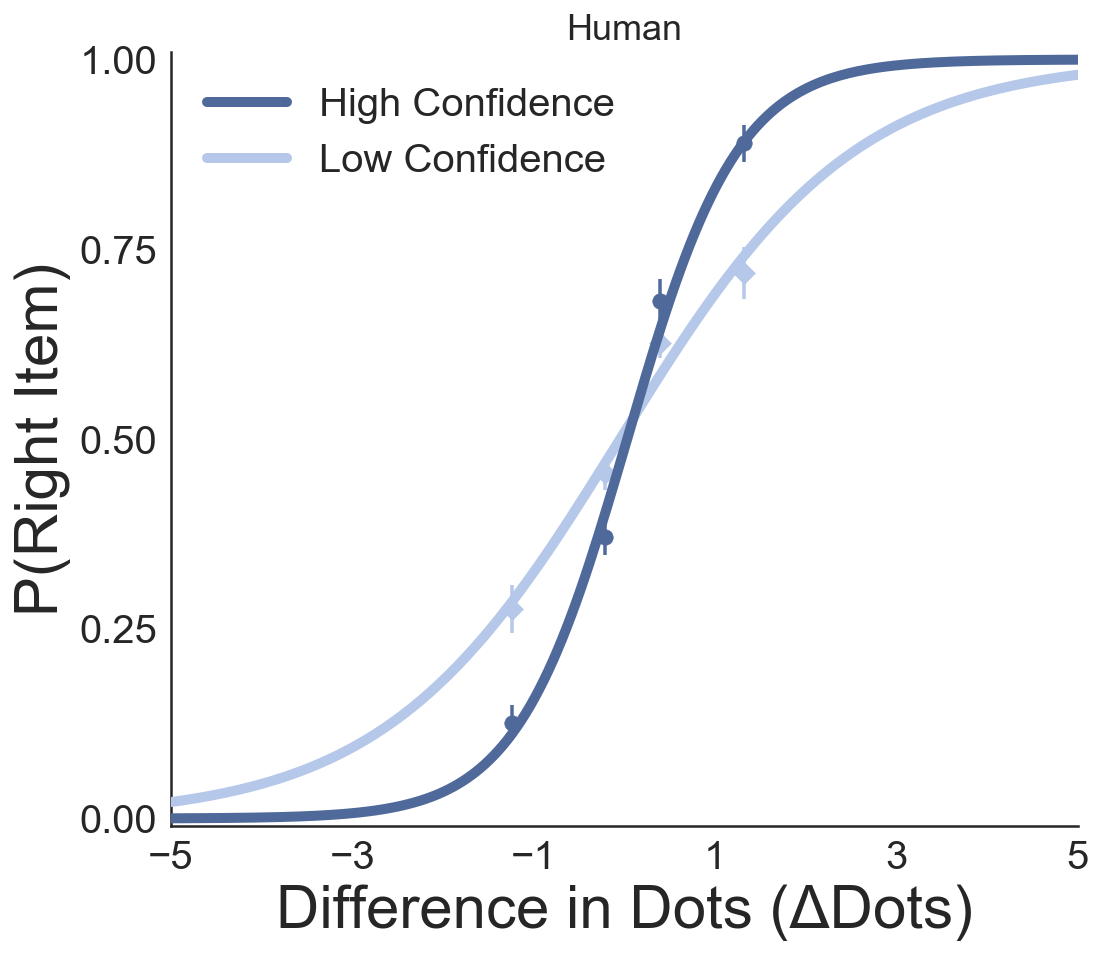

In [55]:
# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_all, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='Human', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Like_Logistic_Human.png'), dpi = 200 )


Low measure:logit coef = [[0.71922445]] ; Intercept:  [-0.02243959]
high measure:logit coef = [[1.5971032]] ; Intercept:  [-0.00652593]


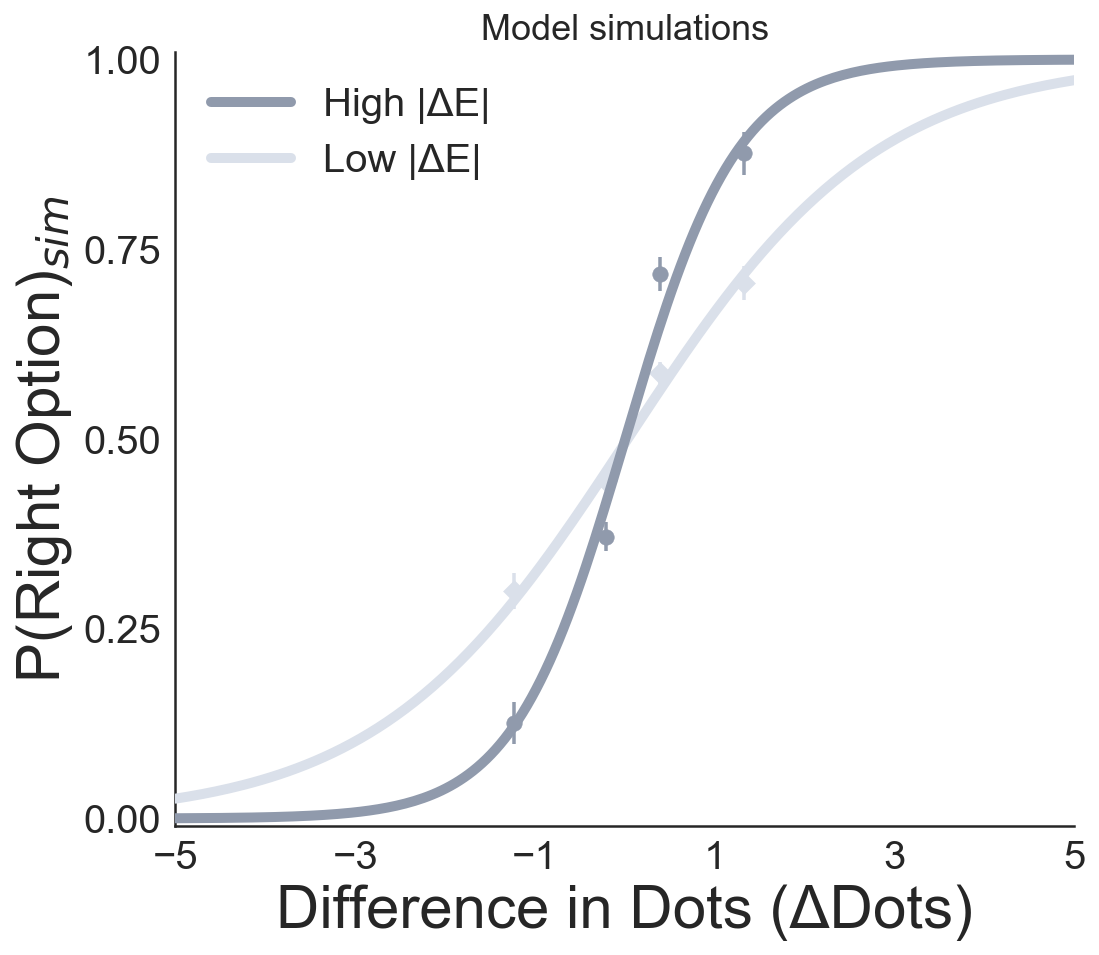

In [56]:
# Split by high/low conf
logisticplot_all('AbsDESplitAll', 'High |ΔE|', 'Low |ΔE|', data=data_simulation_like, xaxis='zDVal', yaxis='Choice_sim', ylab='P(Right Option)'r'$_{sim}$', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#909AAC', modlowcol='#DAE0EA', title='Model simulations', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Like_Logistic_SimsFull.png'), dpi = 200 )


Low measure:logit coef = [[0.66820975]] ; Intercept:  [-0.00628782]
high measure:logit coef = [[1.88838828]] ; Intercept:  [0.00238792]


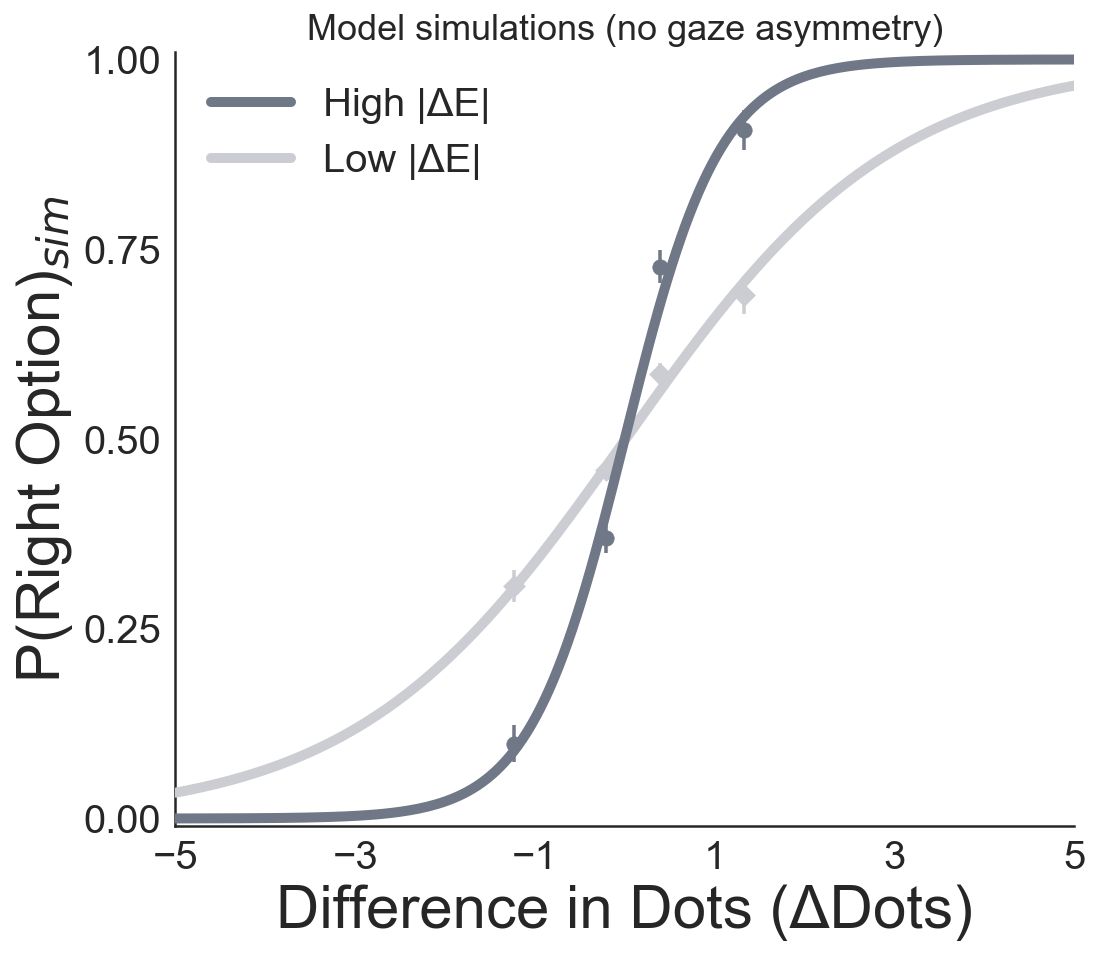

In [57]:
# Split by high/low conf
logisticplot_all('AbsDESplitAll', 'High |ΔE|', 'Low |ΔE|', data=data_simulation_like_nobias, xaxis='zDVal', yaxis='Choice_sim', ylab='P(Right Option)'r'$_{sim}$', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#707786', modlowcol='#CBCDD3', title='Model simulations (no gaze asymmetry)', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Like_Logistic_SimsNoBias.png'), dpi = 200 )



## DISLIKE

# Add Splits considering pooled data
### remember that in the simulations LVal and RVal consider the modification in value we did for Dislike case

In [58]:
data_simulation_dislike["AbsDESplitAll"] = pd.to_numeric(pd.qcut(data_simulation_dislike["AbsDEv"].values, 2, labels=[0, 1]))
# Remember inversion in values
data_simulation_dislike["DVal"] = - ( data_simulation_dislike['RVal'] - data_simulation_dislike['LVal'])
data_simulation_dislike["zDVal"] = z_score1(data_simulation_dislike,'Part',"DVal")

# No bias (no gaze asymmetry simulation)
data_simulation_dislike_nobias["AbsDESplitAll"] = pd.to_numeric(pd.qcut(data_simulation_dislike_nobias["AbsDEv"].values, 2, labels=[0, 1]))
# Remember inversion in values
data_simulation_dislike_nobias["DVal"] = -(data_simulation_dislike_nobias['RVal'] - data_simulation_dislike_nobias['LVal'])
data_simulation_dislike_nobias["zDVal"] = z_score1(data_simulation_dislike_nobias,'Part',"DVal")

Low measure:logit coef = [[-0.6429241]] ; Intercept:  [-0.00475908]
high measure:logit coef = [[-1.36317263]] ; Intercept:  [0.02886479]


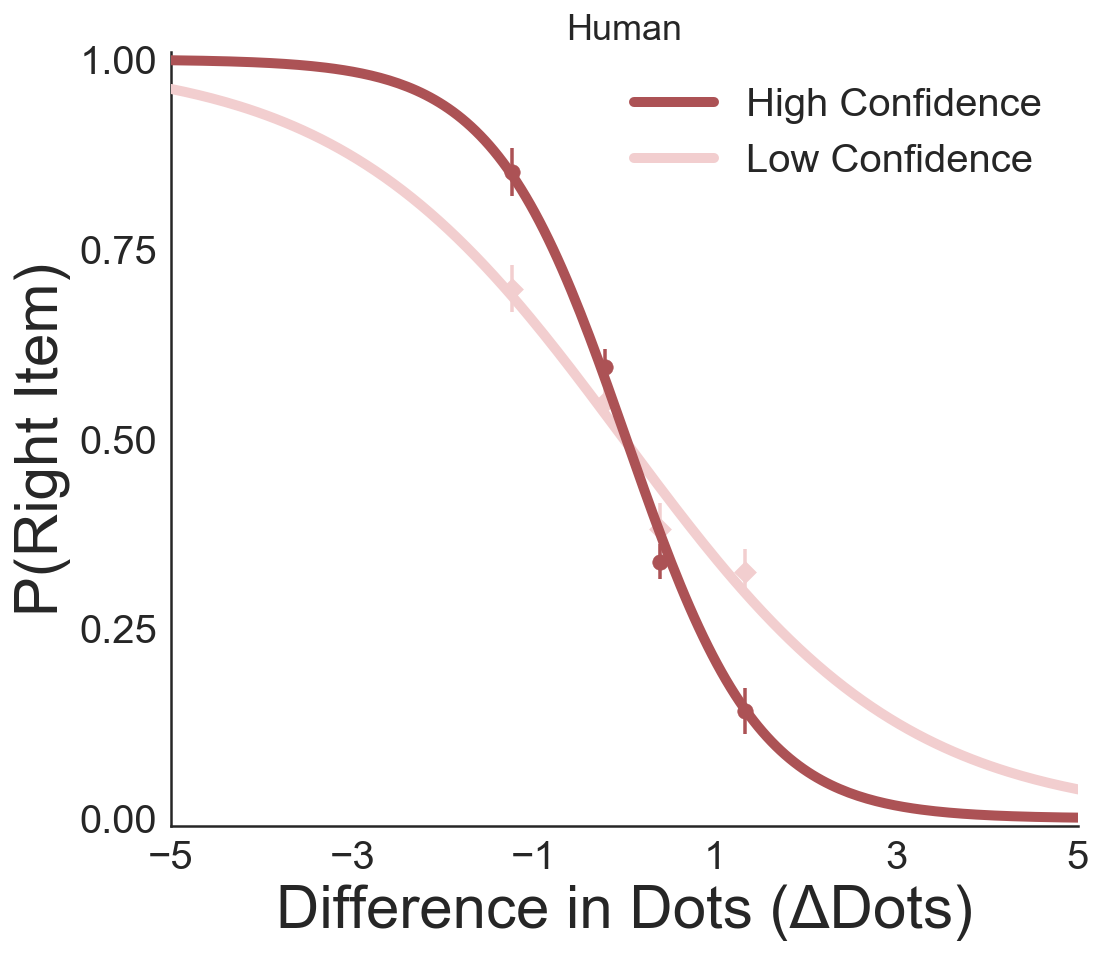

In [59]:
# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_all2, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='Human', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Dislike_Logistic_Human.png'), dpi = 200 )

Low measure:logit coef = [[-0.7250191]] ; Intercept:  [0.01290913]
high measure:logit coef = [[-1.40713951]] ; Intercept:  [0.05904085]


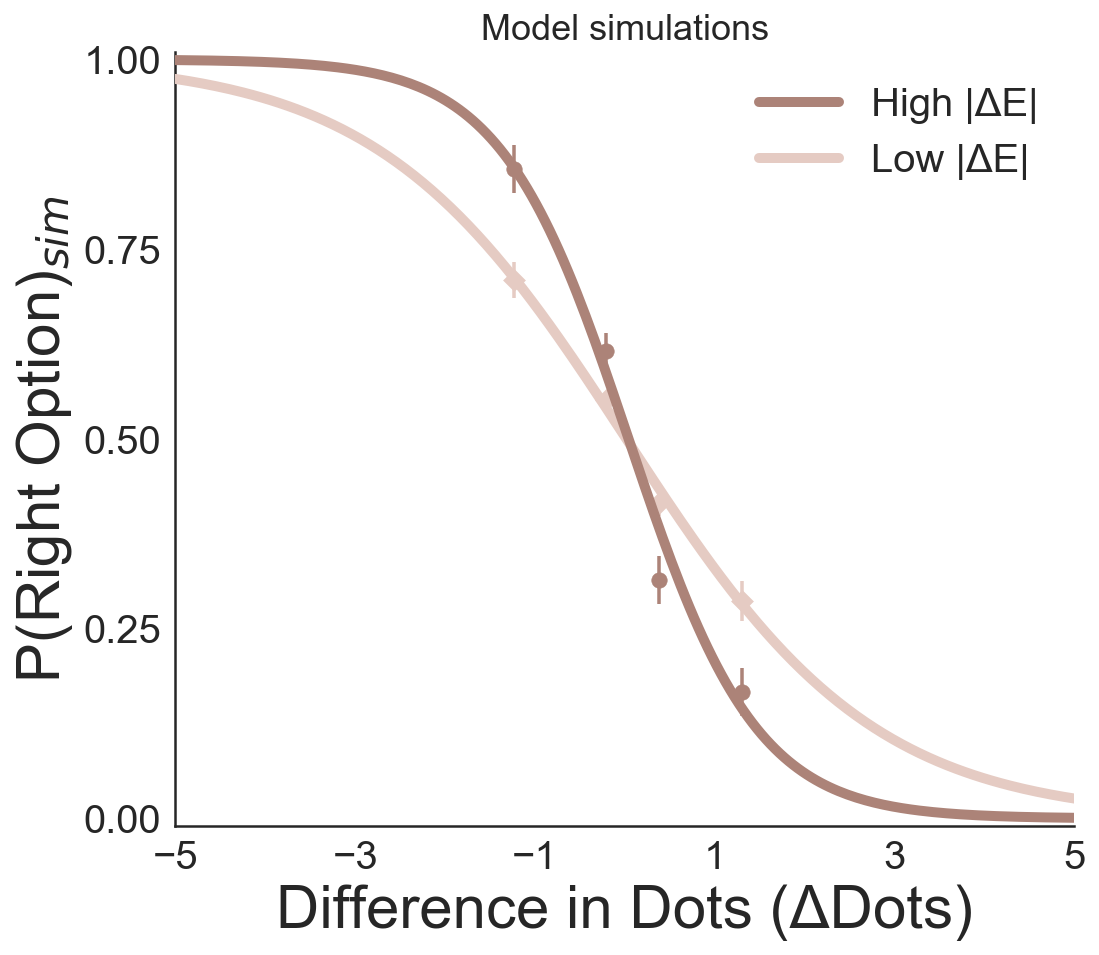

In [60]:
# Split by high/low conf
logisticplot_all('AbsDESplitAll', 'High |ΔE|', 'Low |ΔE|', data=data_simulation_dislike, xaxis='zDVal', yaxis='Choice_sim', ylab='P(Right Option)'r'$_{sim}$', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#AC8378', modlowcol='#E5CBC3', title='Model simulations', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Dislike_Logistic_SimsFull.png'), dpi = 200 )

Low measure:logit coef = [[-0.6932536]] ; Intercept:  [0.0044884]
high measure:logit coef = [[-1.81724776]] ; Intercept:  [0.01766963]


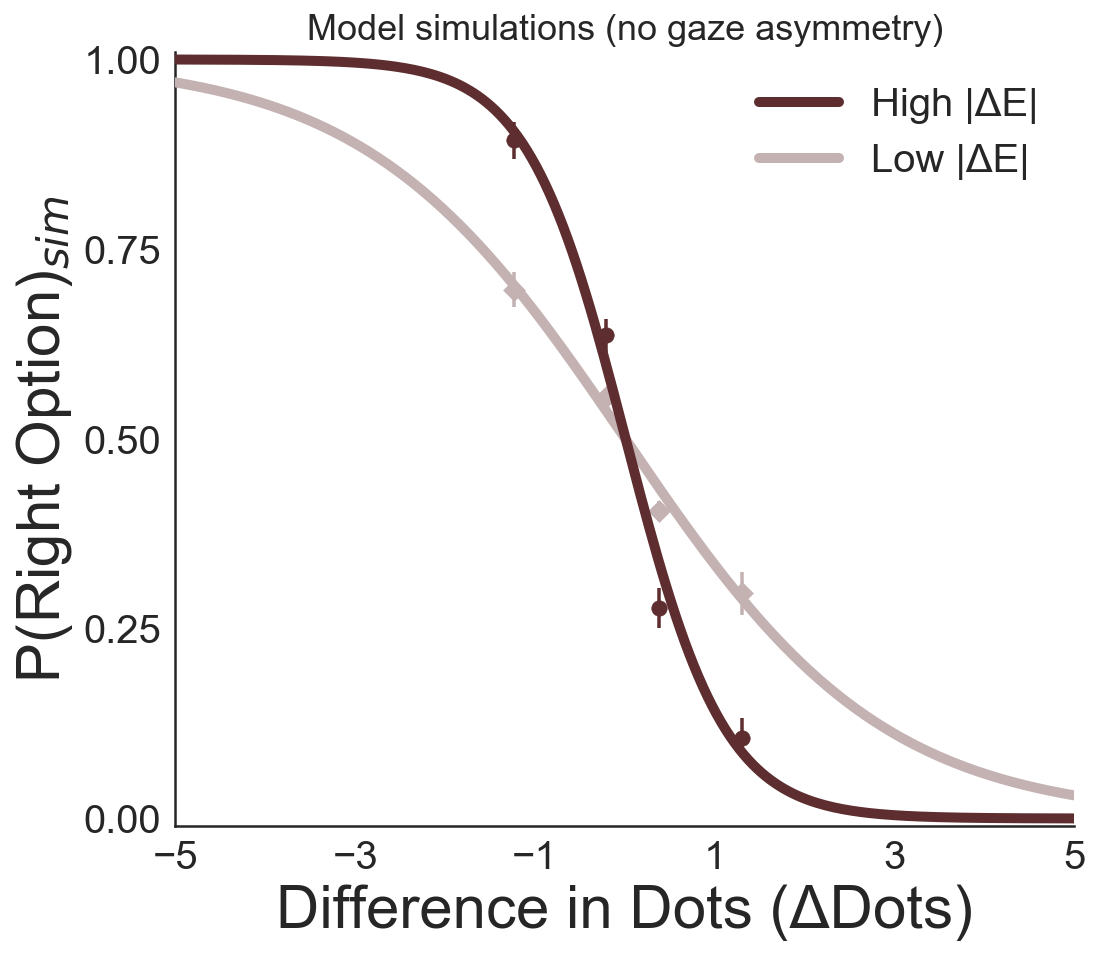

In [61]:
# Split by high/low conf
logisticplot_all('AbsDESplitAll', 'High |ΔE|', 'Low |ΔE|', data=data_simulation_dislike_nobias, xaxis='zDVal', yaxis='Choice_sim', ylab='P(Right Option)'r'$_{sim}$', xlab='Difference in Dots (ΔDots)',
                 modhighcol='#5E2D2F', modlowcol='#C4B2B3', title='Model simulations (no gaze asymmetry)', parvar='Part')
plt.tight_layout()

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Dislike_Logistic_SimsNoBias.png'), dpi = 200 )



# DE regression for simulations

In [62]:
# Human 
data_human_like_table = regtable(one_ModelConf_Coefs_all, one_ModelConf_SE_all,one_ModelConf_ps_all)
data_human_like_table.columns = ['|ΔDots|',"ΣDots",'RT']

data_human_dislike_table = regtable(two_ModelConf_Coefs_all, two_ModelConf_SE_all,two_ModelConf_ps_all)
data_human_dislike_table.columns = ['|ΔDots|',"ΣDots",'RT']

# Simulations
data_simulation_like_table = regtable(one_ModelDev_Coefs_all, one_ModelDev_SE_all,one_ModelDev_ps_all)
data_simulation_like_table.columns = ['|ΔDots|',"ΣDots",'RT'r'$_{sim}$']

data_simulation_dislike_table = regtable(two_ModelDev_Coefs_all, two_ModelDev_SE_all, two_ModelDev_SE_all)
data_simulation_dislike_table.columns = ['|ΔDots|',"ΣDots",'RT'r'$_{sim}$']

# Simulations No bias
data_simulation_like_nobias_table = regtable(one_ModelDev_nobias_Coefs_all, one_ModelDev_nobias_SE_all, one_ModelDev_nobias_ps_all)
data_simulation_like_nobias_table.columns = ['|ΔDots|',"ΣDots",'RT'r'$_{sim}$']

data_simulation_dislike_nobias_table = regtable(two_ModelDev_nobias_Coefs_all, two_ModelDev_nobias_SE_all, two_ModelDev_nobias_ps_all)
data_simulation_dislike_nobias_table.columns = ['|ΔDots|',"ΣDots",'RT'r'$_{sim}$']

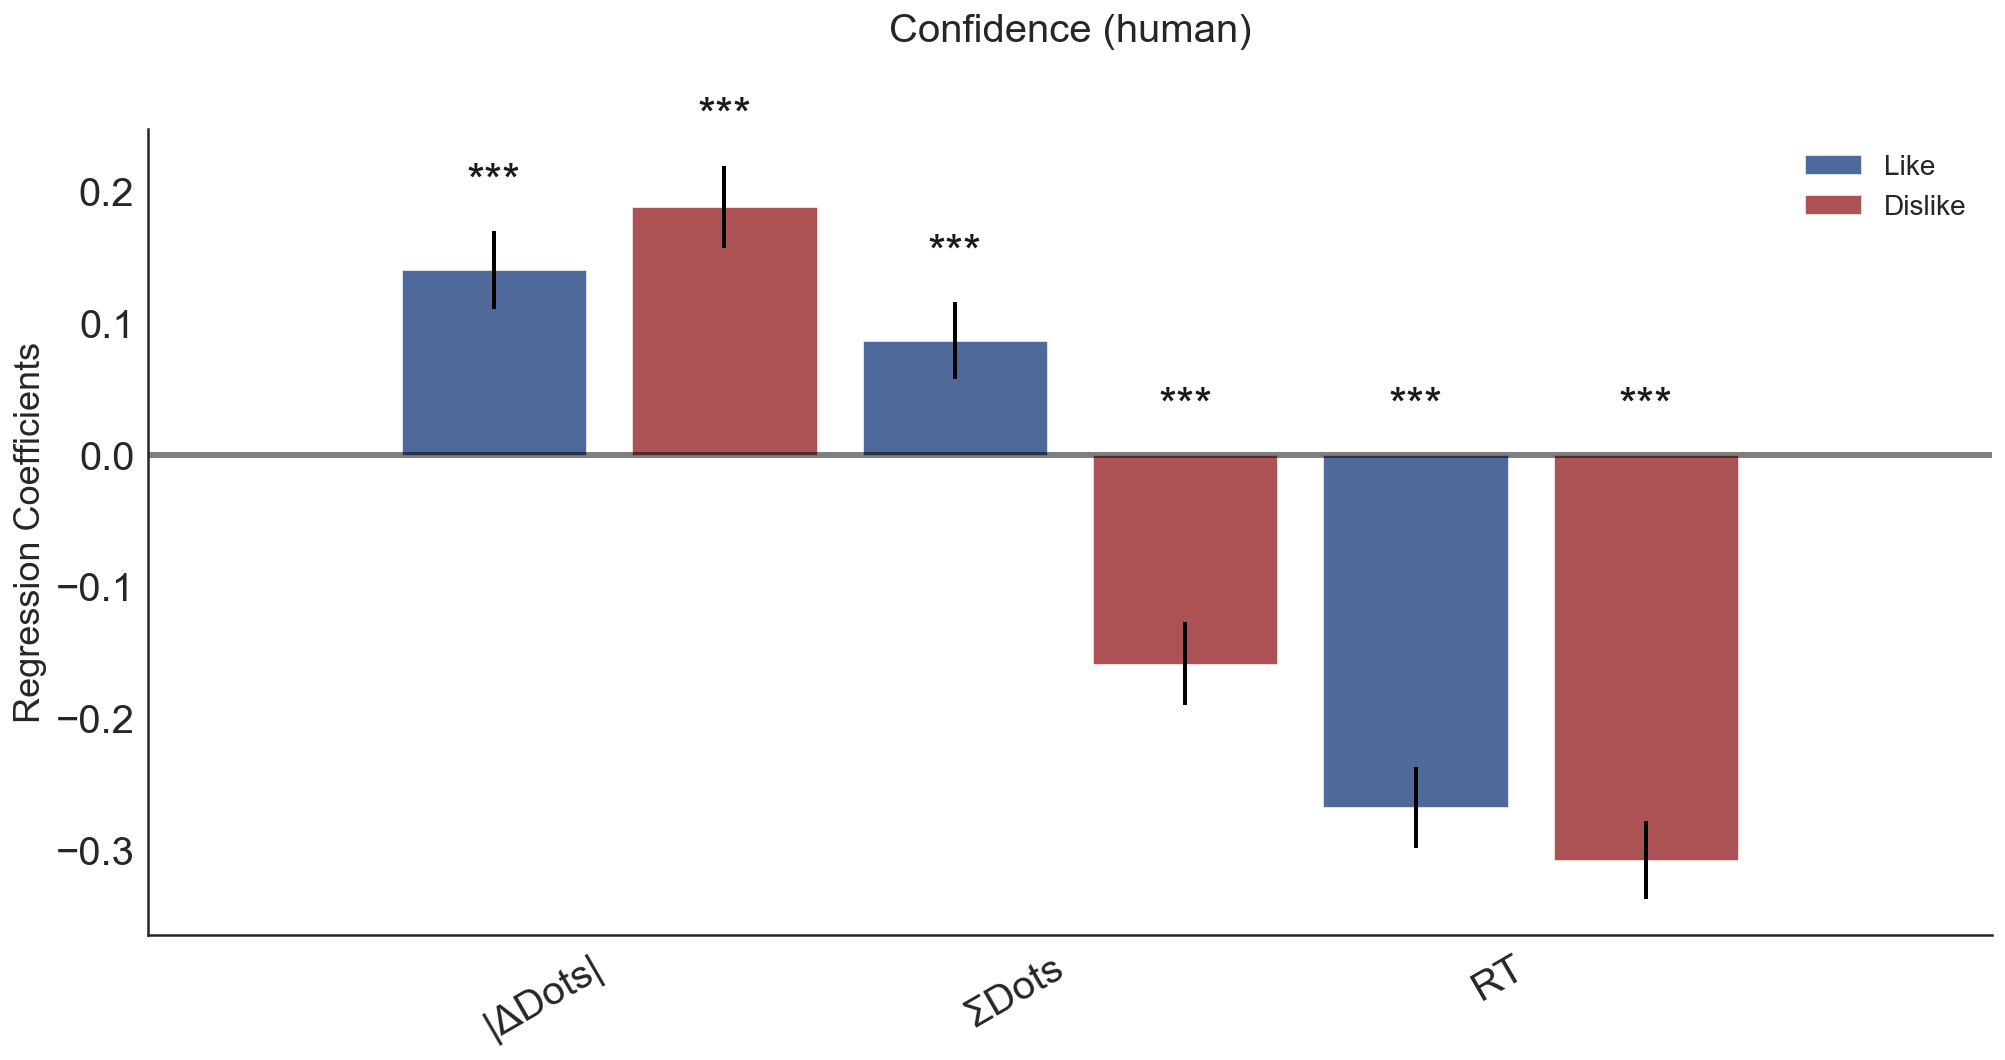

In [63]:
Coefpresplots(data_human_like_table,data_human_dislike_table, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence (human)', size='big',ymultiple=1, ticklabsize=20)

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Regression_Human.png'), dpi = 200 )


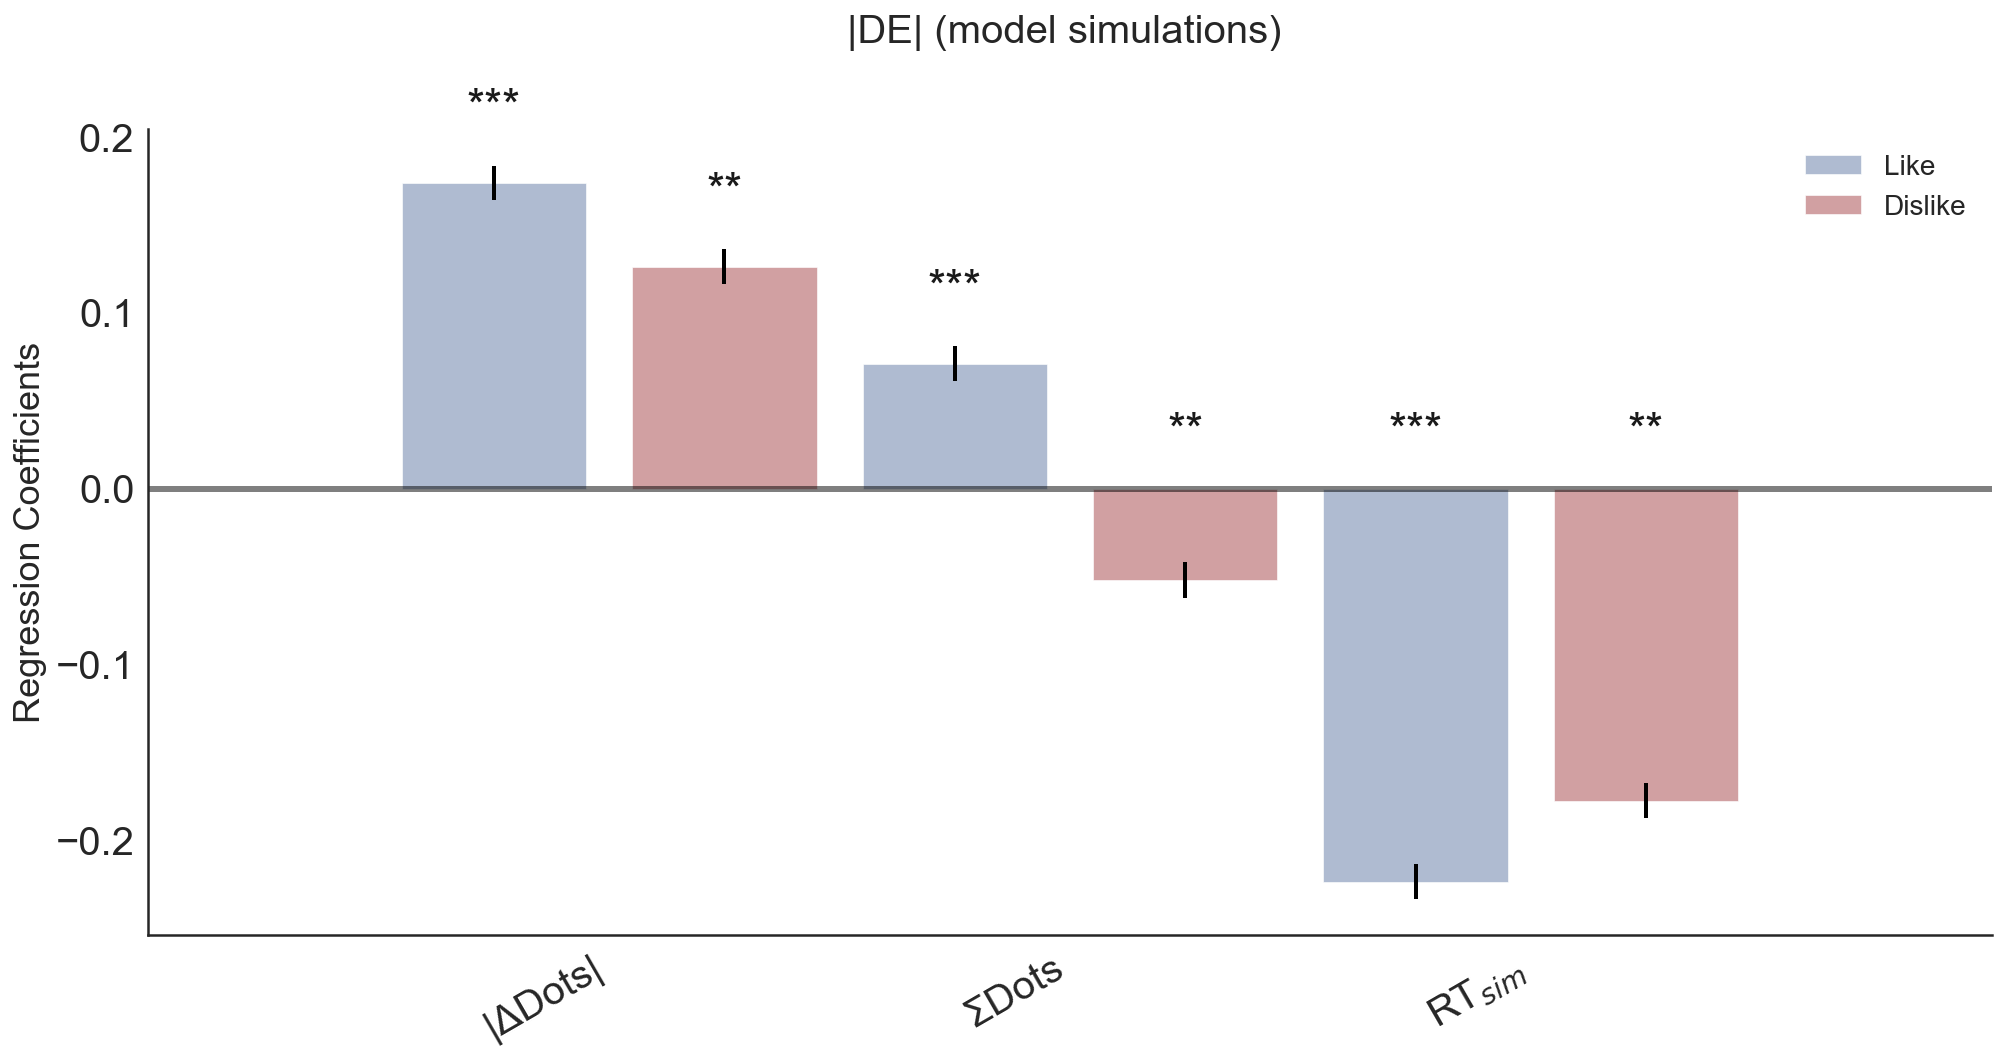

In [64]:
Coefpresplots(data_simulation_like_table,data_simulation_dislike_table, barcol1='#AFBBD1',barcol2='#D1A0A2', title='|DE| (model simulations) ', size='big',ymultiple=1, ticklabsize=20)

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Regression_SimsFull.png'), dpi = 200 )


In [65]:
data_simulation_like_nobias_table

,|ΔDots|,ΣDots,RT$_{sim}$
coefficient,0.213829,-0.007468,-0.210217
se,0.005059,0.004997,0.004972
CImin,0.203913,-0.017261,-0.219962
CImax,0.223745,0.002326,-0.200471
p,0.000000,0.135039,0.000000


In [66]:
data_simulation_dislike_nobias_table

,|ΔDots|,ΣDots,RT$_{sim}$
coefficient,0.213829,-0.007468,-0.210217
se,0.005113,0.005051,0.005024
CImin,0.203808,-0.017368,-0.220064
CImax,0.223850,0.002433,-0.200369
p,0.000000,0.135039,0.000000


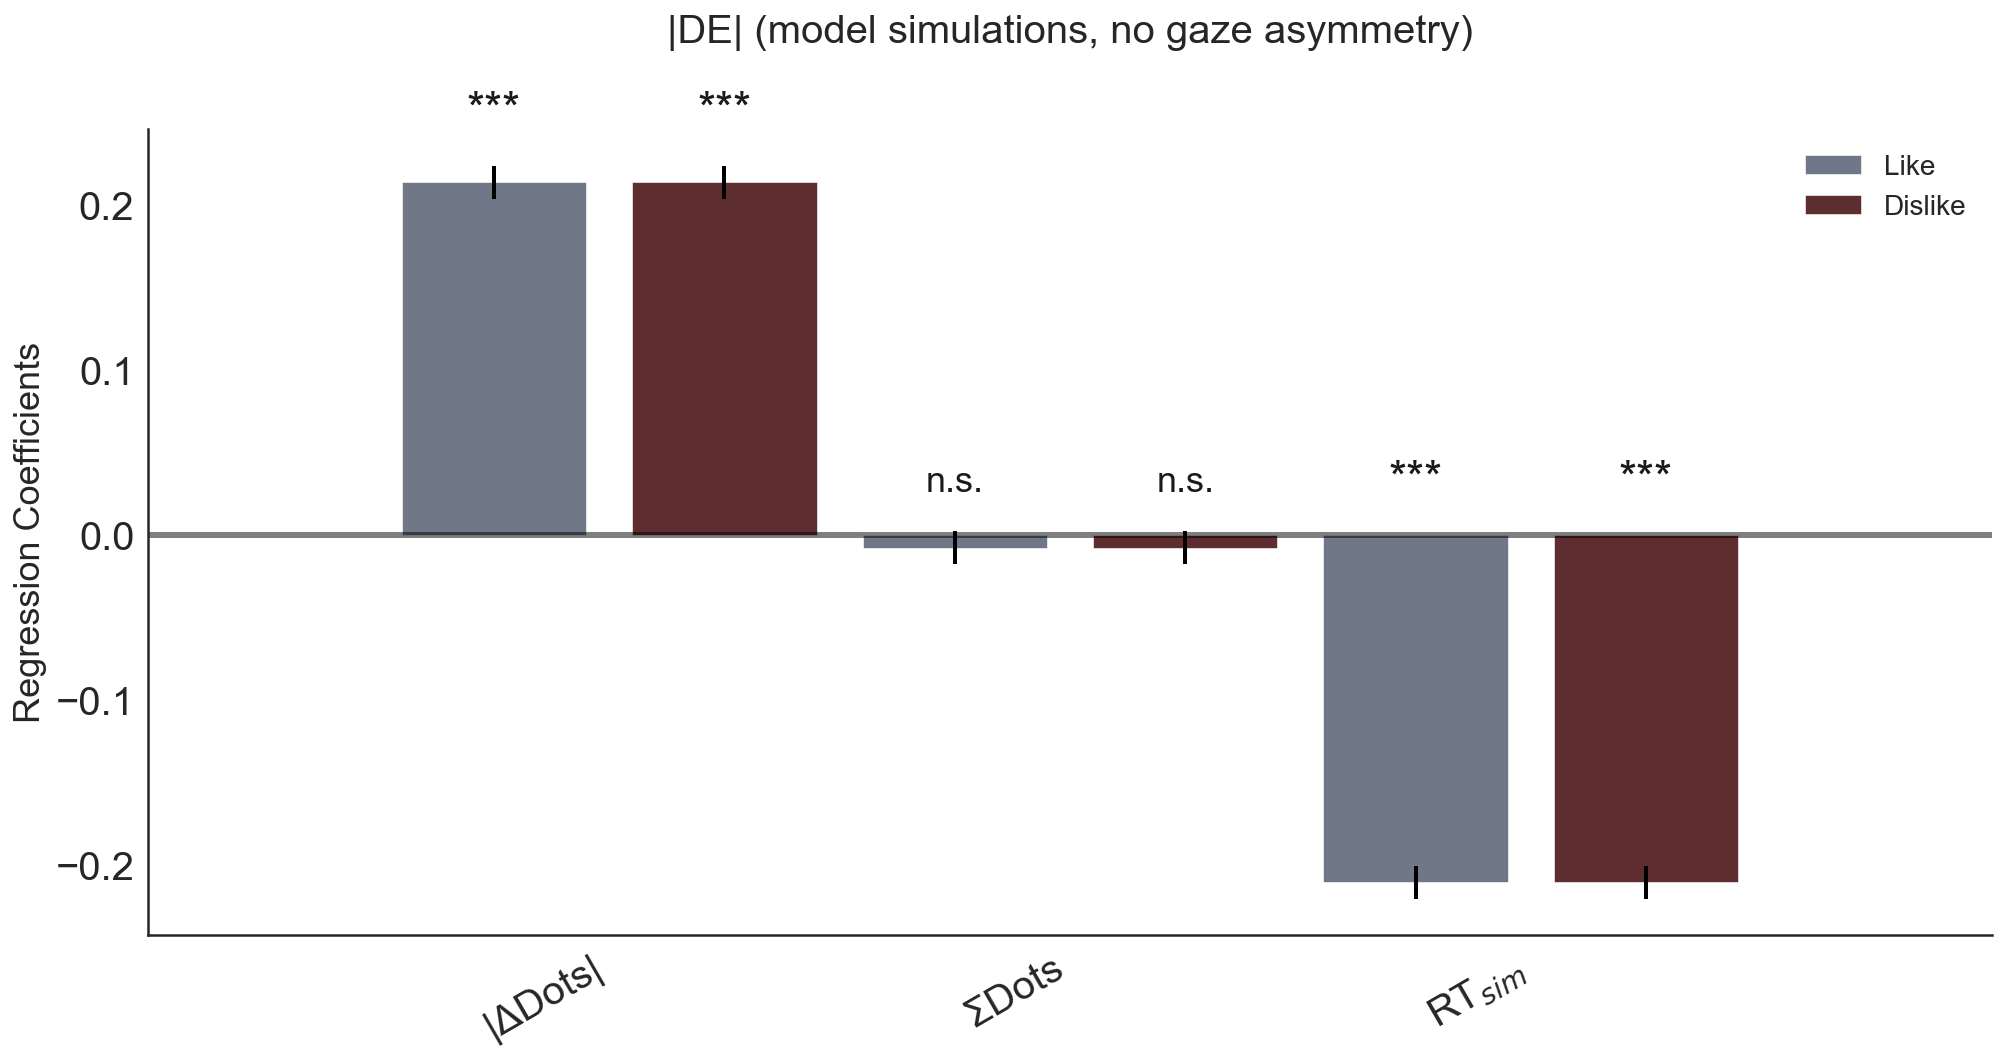

In [67]:
Coefpresplots(data_simulation_like_nobias_table,data_simulation_dislike_nobias_table, barcol1='#707786',barcol2='#5E2D2F', title='|DE| (model simulations, no gaze asymmetry)', size='big',ymultiple=1, ticklabsize=20)

plt.savefig(str('SavedFigures/BalanceEvidenceValue_Regression_SimsNoBias.png'), dpi = 200 )


## --------------------------------------------

# Just for test

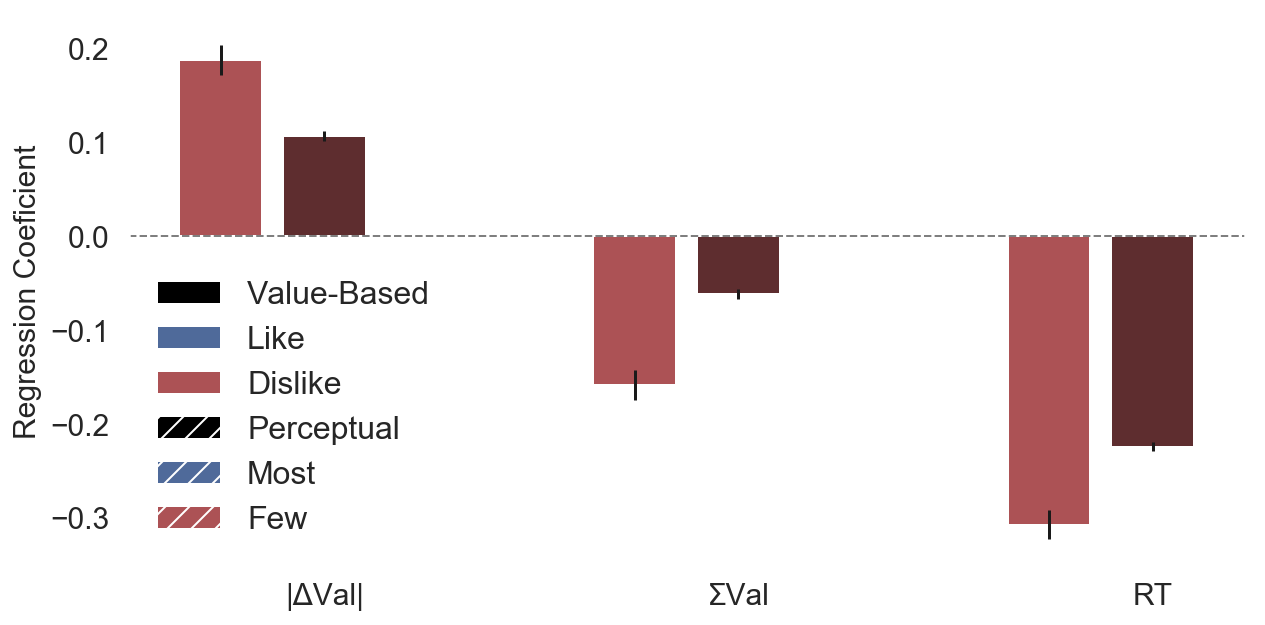

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2
plt.bar(x1, ModelConf_Coefs,yerr=ModelConf_SEs, color=['#AC5255' ],width = width_bars,hatch='')
plt.bar(x2, ModelDev_Coefs, yerr=ModelDev_SEs,  color=['#5E2D2F' ],width = width_bars,hatch='')

plt.xticks(x2, ('|ΔVal|', 'ΣVal','RT'),fontsize=15)#plt.ylim(950, 1200)
plt.ylabel('Regression Coeficient')

vb_patch = mpatches.Patch(facecolor='#000000', label='Value-Based')
p_patch = mpatches.Patch(facecolor='#000000', label='Perceptual',hatch ='//')
like_patch = mpatches.Patch(facecolor='#4F6A9A', label='Like')
more_patch = mpatches.Patch(facecolor='#4F6A9A', label='Most',hatch ='//')
dislike_patch = mpatches.Patch(facecolor='#AC5255', label='Dislike')
less_patch = mpatches.Patch(facecolor='#AC5255', label='Few',hatch ='//')



plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[vb_patch,like_patch,dislike_patch,p_patch,more_patch,less_patch],fontsize=16)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
ax.set_frame_on(True)


#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_Dislike_BalanceEvidence_TotValTESTST.png'), dpi = 200 )

## ---[END]---

# Load toolboxes

In [1]:
#import glam
import pandas as pd
import numpy as np
import os.path
from statsmodels.stats.outliers_influence import summary_table

In [2]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import matplotlib.pyplot as plt

from scipy.stats import invgauss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#plt.switch_backend('agg')
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
import statsmodels.api as sm

#import warnings
#warnings.filterwarnings('ignore')

In [4]:
np.random.seed(23) # from random.org

In [5]:
# For rpy2

import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


TypeError: consoleWarn() missing 1 required positional argument: 'x'

/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 4: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)


In [6]:
# For MacMini proper running
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    plt.show()

In [8]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [9]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

## Custom functions

In [10]:
def balance_evidence(value_tests, gaze_tests, parameters,boundary, error_weight, error_range,n_repeats):
    
    mean_rts_trials = np.zeros((value_tests.shape[0])) * np.nan
    choice_trials = np.zeros((value_tests.shape[0])) * np.nan
    DEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    AbsDEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    Ev_drifts_0_trials  = []
    Ev_drifts_1_trials = []

    n_trials, n_items = value_tests.shape

    running_idx_value = 0
    #we iterate for all the combinations of trials + gaze
    for trial in range(n_trials):
        
            # intialize the drifts
            evidence_drifts_0 = []
            evidence_drifts_1 = []

            #define value and gaze values for this particular trial
            value_trial =value_tests[trial]
            gaze_trial =gaze_tests[trial]
            
            Sim_value = value_trial
            Sim_gaze = gaze_trial
            
            Delta_E = np.zeros(n_repeats) * np.nan            
            AbsDelta_E = np.zeros(n_repeats) * np.nan
            rts = np.zeros(n_repeats) * np.nan
            choices = np.zeros(n_repeats) * np.nan
            trial_idx = np.zeros(n_repeats) * np.nan
            repeat_idx = np.zeros(n_repeats) * np.nan
            running_idx = 0
        
            for repeat in range(n_repeats):
                    

                    
                    Evi_0, Evi_1, choice, rt = glam.driftSim.simulate_trial_drift(parameters, value_trial, gaze_trial,
                                                boundary=boundary,
                                                error_weight=error_weight,
                                                error_range=error_range)
                    
                    Delta_E[running_idx] = Evi_1[-1] - Evi_0[-1]
                    AbsDelta_E[running_idx] = abs(Evi_0[-1] - Evi_1[-1])                        
                    rts[running_idx] = rt
                    choices[running_idx] = choice
                    trial_idx[running_idx] = trial
                    repeat_idx[running_idx] = repeat
                    # Add a new sequence of drift for this particular trial
                    evidence_drifts_0.append(Evi_0)
                    evidence_drifts_1.append(Evi_1)
                    
                    running_idx += 1
                    
               
            # Add the mean value for this parameters interation               
            mean_rts_trials [running_idx_value] = rts.mean()
            choice_trials [running_idx_value]= choices.mean() 
            DEv_trials [running_idx_value] = Delta_E.mean()
            AbsDEv_trials [running_idx_value]= AbsDelta_E.mean()
            Ev_drifts_0_trials.append(evidence_drifts_0)
            Ev_drifts_1_trials.append(evidence_drifts_1)
 
            running_idx_value += 1 

    return AbsDEv_trials,mean_rts_trials,Ev_drifts_0_trials,Ev_drifts_1_trials,choice_trials

In [11]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

    
        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [12]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    plt.show()

In [13]:
def add_difficulty(df):
    """
    Compute trial difficulties and add to DataFrame.

    Maximum value -  other values.
    In the binary case, this reduces to abs(v0 - v1).

    Parameters
    ----------
    df :      <pandas DataFrame>
              Trial wise DataFrame containing columns for item_value_i
    """

    values = df[['LVal','RVal']].values
    values_sorted = np.sort(values, axis=1)
    difficulty = values_sorted[:, -1] - np.mean(values_sorted[:, :-1], axis=1)

    levels =  (np.max(difficulty) - np.min(difficulty))/10

    lev_label = np.arange(np.min(difficulty), np.max(difficulty) + levels,levels) 
    
    difficulty2= []
    for i in range(len(difficulty)):
         difficulty2.append( lev_label[ int(difficulty[i]//levels)] )
     
    difficulty = difficulty2
    
    df['difficulty'] = np.around(difficulty, decimals = 0)
    df['difficulty'] = difficulty
    
    return df.copy()

In [14]:
def plot_DEv_Conf(data, ax=None, xlims=(0, 10), xlabel_skip=2,color1 = '#4F6A9A'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 15))
        # Set seaborn style for the plot
        sns.set(style='white')

    df = data.copy()

    # Compute relevant variables
    df = add_difficulty(df)
    
    
    # select data to use
    
    data_labels = ['zConf_human','zAbsDEv']
    
    for i in range(len(data_labels)):
        # Compute summary statistics
        subject_means = df.groupby(['Part', 'difficulty'])[data_labels[i]].mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]
    
        x = np.arange(len(means))
        
        # Add labels for scatter plot of mean rt per participant
        scatter_data = subject_means.reset_index()
        x_scatter = []
        group_labels = np.sort(scatter_data.difficulty.unique())
        for ii in range(len(scatter_data.difficulty.values)):
            a = scatter_data.difficulty.values[ii]
            position_item =  x[np.where(group_labels==a)[0][0]]
            x_scatter.append(position_item) 
        ## ********    
        
        predicted = False if i == 0 else True
        
        # Colors for predicted
        c_pred = [color1,'#606060','#607681' ]
        
        if not predicted:  # plot underlying data
            ax.plot(x, means, 'o', markerfacecolor=color1, markersize = 10, fillstyle = 'full',
                    color=color1, linewidth=1)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color= color1)
            jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
            ax.plot(x_scatter+jittr, scatter_data[data_labels[i]].values, marker='o', ms=5, color=color1,alpha=0.3,linestyle="None")
    
        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor=c_pred[i],color=c_pred[i], linewidth=2.5, markersize = 10)

    #ax.set_ylim(2000, 3500)
    font_size_this = 22
    ax.set_xlabel('|ΔVal|',fontsize=font_size_this)
    ax.set_ylabel( r'zΔ$\epsilon$ / zConfidence',fontsize=font_size_this)
    ax.set_xticks(x[::xlabel_skip])
    ax.tick_params(axis = 'y',labelsize=font_size_this)
    ax.tick_params(axis = 'x',labelsize=font_size_this)

    ax.set_xticklabels(np.around(means.index.values[::xlabel_skip],decimals = 1))
    sns.despine()



In [15]:
def add_difficulty_TotVal(df,TotVal_label):
    """
    Compute trial difficulties and add to DataFrame.

    Maximum value -  other values.
    In the binary case, this reduces to abs(v0 - v1).

    Parameters
    ----------
    df :      <pandas DataFrame>
              Trial wise DataFrame containing columns for item_value_i
    """

    difficulty = df[[TotVal_label]].values

    levels =  (np.max(difficulty) - np.min(difficulty))/10

    lev_label = np.arange(np.min(difficulty), np.max(difficulty) + levels,levels) 
    
    difficulty2= []
    for i in range(len(difficulty)):
         difficulty2.append( lev_label[ int(difficulty[i]//levels)] )
     
    difficulty = difficulty2
    
    df['difficulty'] = np.around(difficulty, decimals = 0)
    df['difficulty'] = difficulty
    
    return df.copy()

In [16]:
def plot_DEv_Conf_TotVal(data, TotVal_label, ax=None, xlims=(0, 10), xlabel_skip=2,color1 = '#4F6A9A'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 15))
        # Set seaborn style for the plot
        sns.set(style='white')

    df = data.copy()

    # Compute relevant variables
    df = add_difficulty_TotVal(df,TotVal_label)
    print ('Done with TotVal')
    
    # select data to use
    
    data_labels = ['zConf_human','zAbsDEv']
    
    for i in range(len(data_labels)):
        # Compute summary statistics
        subject_means = df.groupby(['Part','difficulty'])[data_labels[i]].mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]
    
        x = np.arange(len(means))
        
        # Add labels for scatter plot of mean rt per participant
        scatter_data = subject_means.reset_index()
        x_scatter = []
        group_labels = np.sort(scatter_data.difficulty.unique())
        for ii in range(len(scatter_data.difficulty.values)):
            a = scatter_data.difficulty.values[ii]
            position_item =  x[np.where(group_labels==a)[0][0]]
            x_scatter.append(position_item) 
        ## ********    
        
        predicted = False if i == 0 else True
        
        # Colors for predicted
        c_pred = [color1,'#606060','#607681' ]
        
        if not predicted:  # plot underlying data
            ax.plot(x, means, 'o', markerfacecolor=color1, markersize = 10, fillstyle = 'full',
                    color=color1, linewidth=1)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color= color1)
            jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
            ax.plot(x_scatter+jittr, scatter_data[data_labels[i]].values, marker='o', ms=5, color=color1,alpha=0.3,linestyle="None")
    
        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor=c_pred[i],color=c_pred[i], linewidth=2.5, markersize = 10)
    font_size_this = 22
    #ax.set_ylim(2000, 3500)
    ax.set_xlabel('|ΣVal|',fontsize=font_size_this)
    ax.set_ylabel( r'zΔ$\epsilon$ / zConfidence',fontsize=font_size_this)
    ax.set_xticks(x[::xlabel_skip])
    ax.tick_params(axis = 'y',labelsize=font_size_this)
    ax.tick_params(axis = 'x',labelsize=font_size_this)
    ax.set_xticklabels(np.around(means.index.values[::xlabel_skip],decimals = 1))
    sns.despine()


In [17]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the s, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r-', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r-', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

In [18]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

In [19]:
def Coefpresplots(regtable1, regtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
  #  # Set axis limits based on whether to include the intercept or not   
  #  # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns) +1)
  #      YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
  #  if ylimits != ():
  #      YLim = ylimits
    ax.set_xlim(XLim)
  #  ax.set_ylim(YLim)
  #  
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='-', alpha = 0.5, lw=3)  
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-bar_sep, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],hatch=r'',edgecolor='white')
        ax.errorbar(position-bar_sep, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
        if regtable1.loc['p', Coefficient]<=0.05:
            add_star_indiv(position-bar_sep, regtable1.loc['coefficient', Coefficient], regtable1.loc['se', Coefficient]*1.96,regtable1.loc['p', Coefficient])
        else:
            add_ns_indiv(position-bar_sep, regtable1.loc['coefficient', Coefficient], regtable1.loc['se', Coefficient]*1.96)
        
        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],hatch=r'',edgecolor='white')
        ax.errorbar(position+bar_sep, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
        if regtable2.loc['p', Coefficient]<=0.05:
            add_star_indiv(position+bar_sep, regtable2.loc['coefficient', Coefficient], regtable2.loc['se', Coefficient]*1.96,regtable2.loc['p', Coefficient])
        else:
            add_ns_indiv(position+bar_sep, regtable2.loc['coefficient', Coefficient], regtable2.loc['se', Coefficient]*1.96)

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    #ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],edgecolor='white',hatch=r'', label='Like')
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],edgecolor='white',hatch=r'', label='Dislike')

    leg = plt.legend(handles=[patch1,patch2],fontsize=14)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    sns.despine()

In [20]:
def regtable(fix, fix_se, fix_p):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose();
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[4] = np.array(fix_p)

    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax','p']
    return fixed_betas

In [21]:
# Add asterisk
def add_star_indiv(x11, y_tall, err_tall,p):
    #plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    y_add = 0
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
    
    if (y_tall+err_tall)>0: 
        y_add = y_tall+err_tall   
    plt.text(x11, y_add + 0.02, star_text, ha='center', va='bottom', color='k',fontsize=23)

# Add non-significant
def add_ns_indiv(x11, y_tall, err_tall):
    #plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    y_add = 0
    if (y_tall+err_tall)>0: 
        y_add = y_tall+err_tall   
    plt.text(x11, y_add + 0.02, "n.s.", ha='center', va='bottom', color='k',fontsize=18)